### Load tensorflow

In [1]:
import tensorflow as tf

### Collect Data

In [2]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
demo = pd.read_csv("loan_data.csv")
demo = demo.drop('purpose',axis=1)
demo.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
X=demo.drop('not.fully.paid',axis=1)
y=demo['not.fully.paid']

In [4]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
rf.fit(X,y)
gb.fit(X,y)
print(gb.feature_importances_)
print(rf.feature_importances_)

[0.15328975 0.17112209 0.11813998 0.10999208 0.04187653 0.05761365
 0.0745965  0.0789874  0.07045571 0.10097259 0.00445317 0.01850055]
[0.01597171 0.108284   0.12270414 0.11794925 0.11662199 0.08122012
 0.1198157  0.11967399 0.12078445 0.05299564 0.01513236 0.00884666]


<AxesSubplot:>

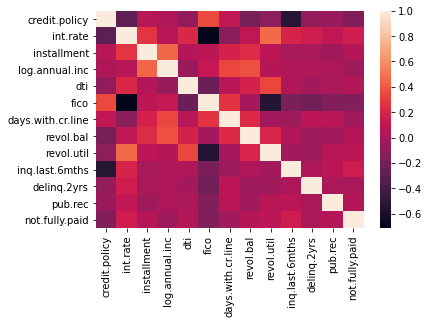

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(demo.corr())

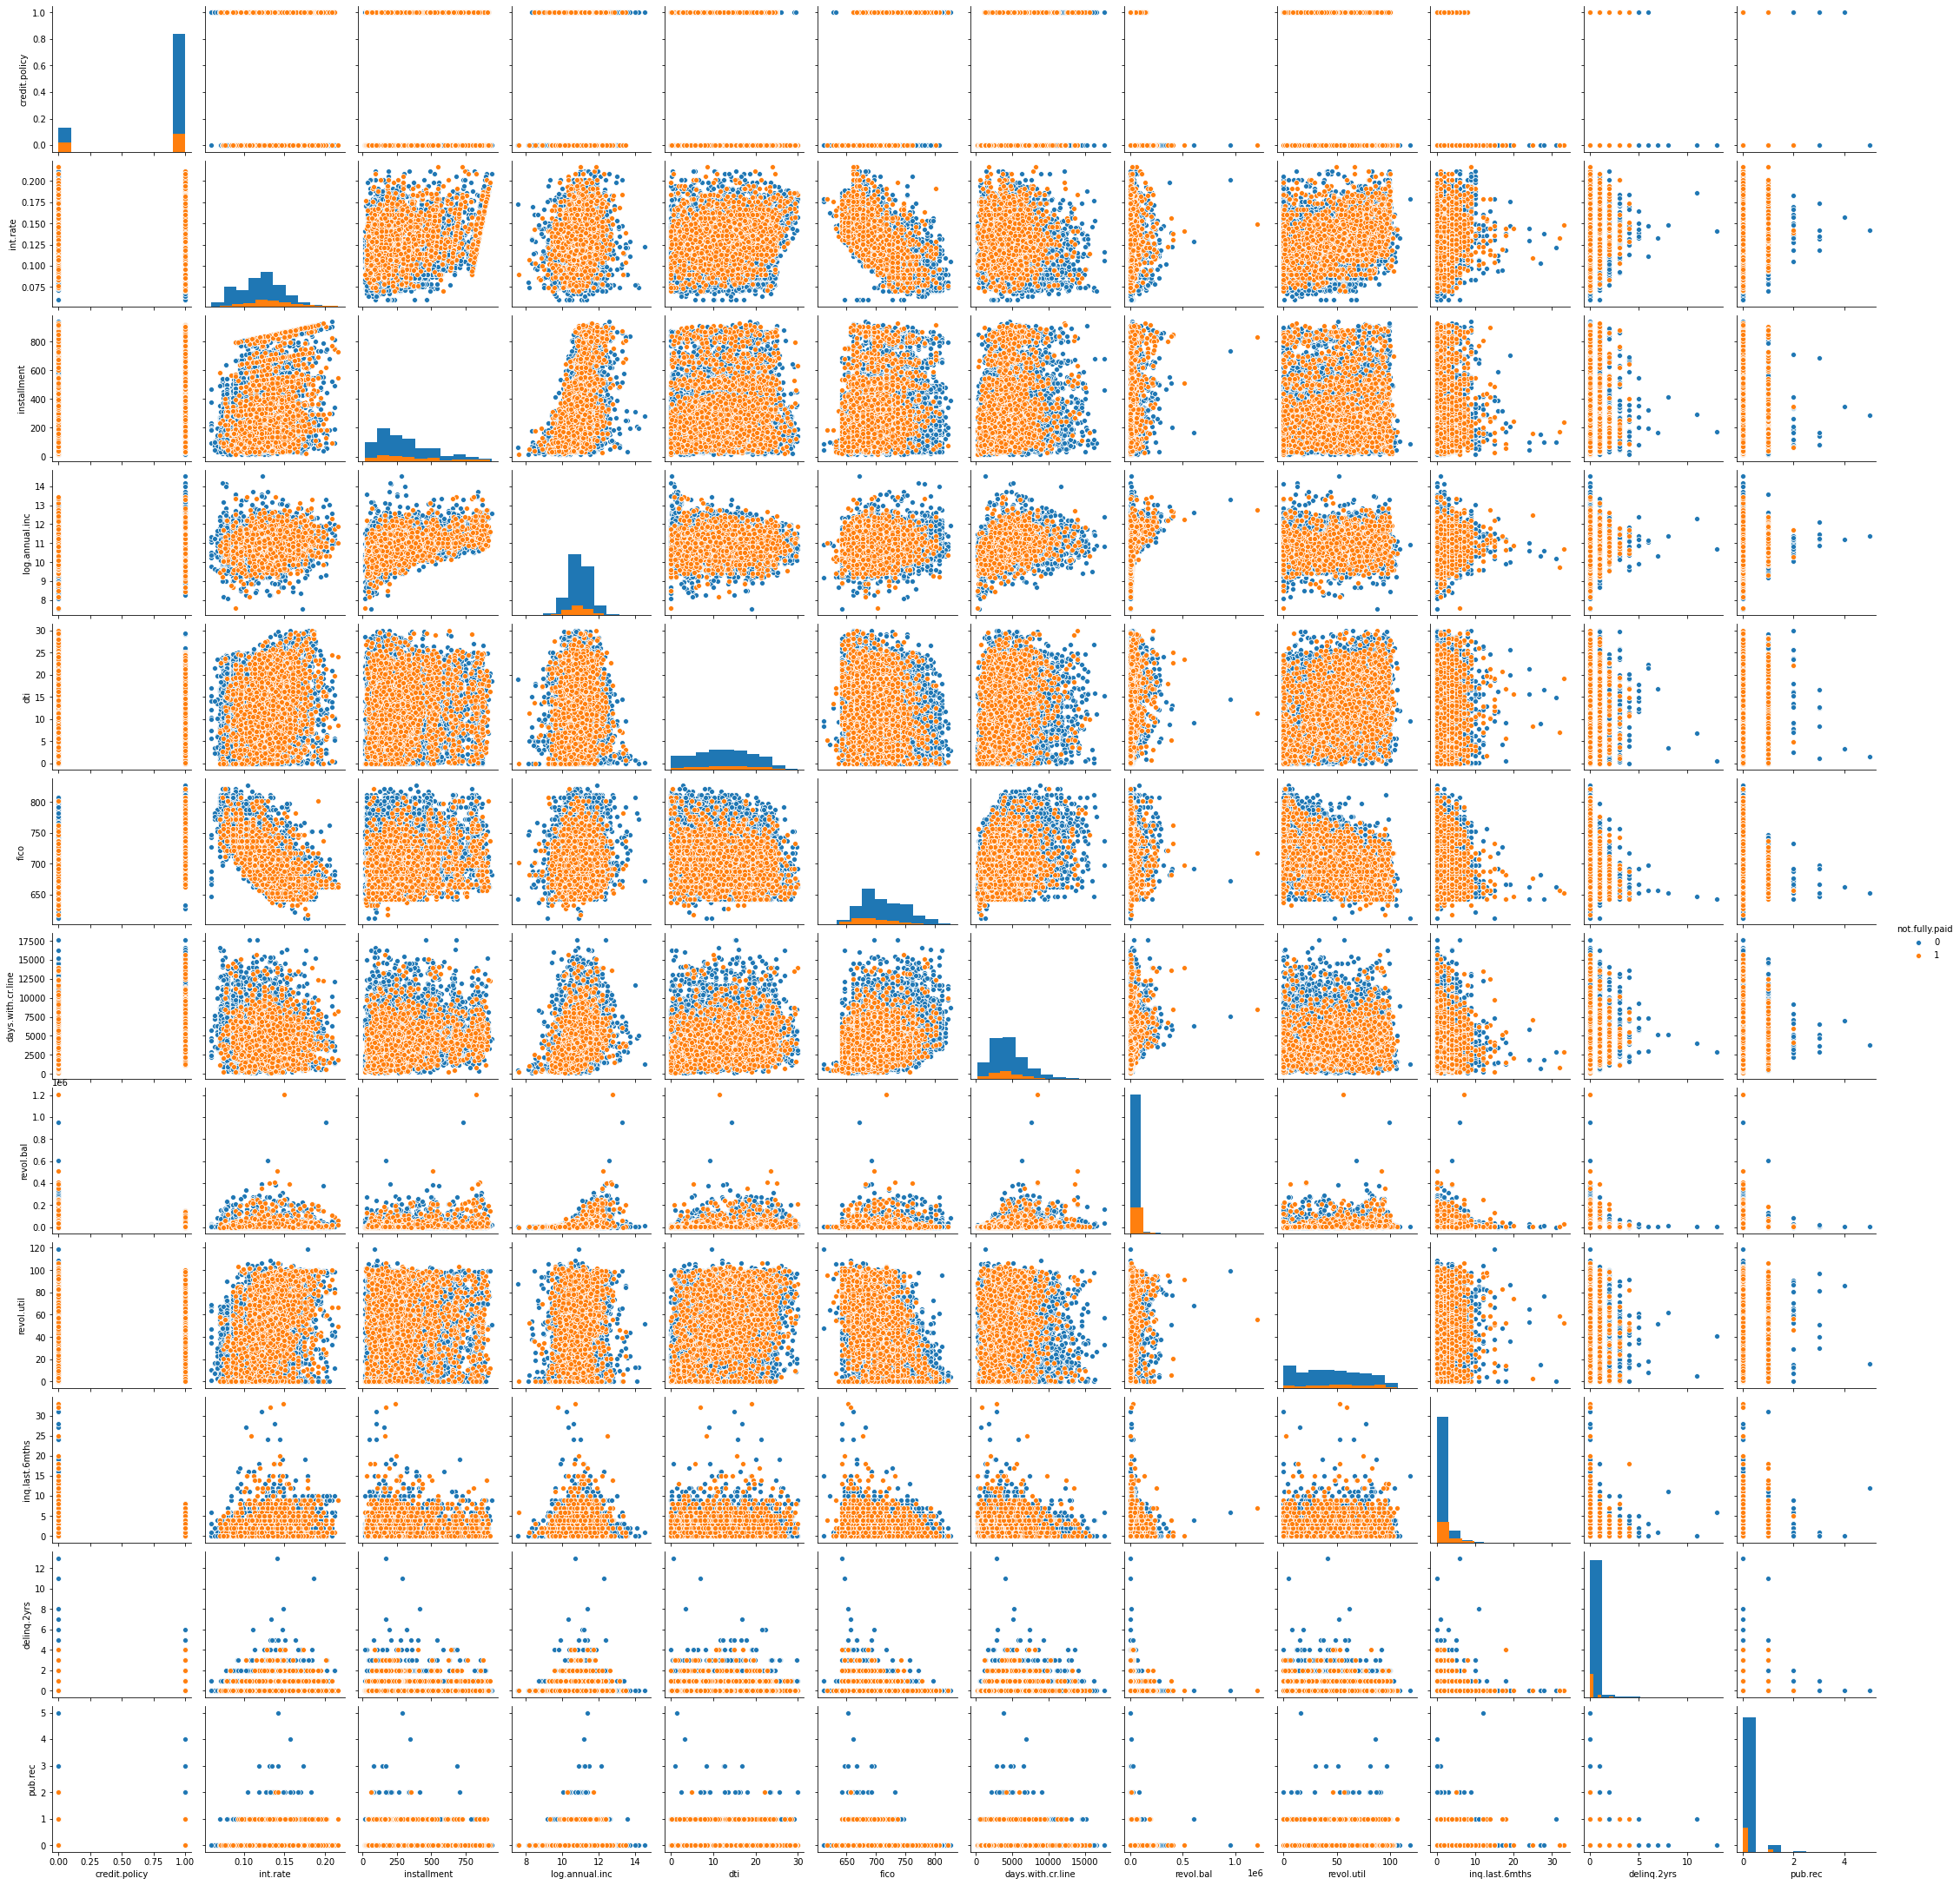

In [8]:
sns.pairplot(demo,diag_kind='hist',hue="not.fully.paid")

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

## Build the Graph

In [6]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((12,),input_shape=(12,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

## Build the Graph...

In [7]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(2000))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [8]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [9]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(600))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())

In [10]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(300))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [11]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

## Build the Graph...

In [12]:
#Create optimizer with non-default learning rate
adam_op = tf.keras.optimizers.Adam(lr=0.05)
#Compile the model
model.compile(optimizer=adam_op, loss='binary_crossentropy', metrics=['accuracy'])

## Train the model

In [13]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=20,
          batch_size=32)

Epoch 1/20
240/240 [==============================] - 7s 30ms/step - loss: 0.5737 - accuracy: 0.8221 - val_loss: 0.4345 - val_accuracy: 0.8346
Epoch 2/20
240/240 [==============================] - 7s 30ms/step - loss: 0.4244 - accuracy: 0.8401 - val_loss: 0.4269 - val_accuracy: 0.8330
Epoch 3/20
240/240 [==============================] - 7s 29ms/step - loss: 0.4173 - accuracy: 0.8414 - val_loss: 0.4254 - val_accuracy: 0.8319
Epoch 4/20
240/240 [==============================] - 7s 29ms/step - loss: 0.4180 - accuracy: 0.8417 - val_loss: 0.4276 - val_accuracy: 0.8330
Epoch 5/20
240/240 [==============================] - 7s 29ms/step - loss: 0.4175 - accuracy: 0.8399 - val_loss: 0.4254 - val_accuracy: 0.8340
Epoch 6/20
240/240 [==============================] - 7s 28ms/step - loss: 0.4276 - accuracy: 0.8383 - val_loss: 0.4274 - val_accuracy: 0.8309
Epoch 7/20
240/240 [==============================] - 7s 29ms/step - loss: 0.4238 - accuracy: 0.8389 - val_loss: 0.4328 - val_accuracy: 0.8309